In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### load in the Boston data set

In [96]:
boston = pd.read_csv('Boston.csv')

In [97]:
boston.rename(columns = {'crim': 'crime_rate', 'zn': 'residential_land_zoned', 'indus': 'non-retail_business_acres',
                        'chas': 'charles_river', 'nox': 'nitrogen_oxides', 'rm': 'average_number_rooms', 'age': 'owner-occupied<1940',
                        'dis': 'dis_5_boston_emp_centers', 'rad': 'accessibility_radial_highways', 'tax': 'tax', 'ptratio': 'pupil_teacher_ratio',
                        'lstat': 'lower_status', 'medv': 'median_value'}, inplace = True)

In [98]:
boston.head()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### How many rows are in this data set? How many columns? What do the rows and columns represent?

In [99]:
print('rows: ', boston.shape[0], '\ncolumns: ', boston.shape[1],
     '\nRows represents the suburbs and Columns represents the features of suburbs')

rows:  506 
columns:  13 
Rows represents the suburbs and Columns represents the features of suburbs


#### Make some pairwise scatterplots of the predictors

C:\Users\PCS\AppData\Local\Temp\ipykernel_8888\198254969.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(boston[['crime_rate', 'tax', 'accessibility_radial_highways', 'lower_status']], ax = ax);


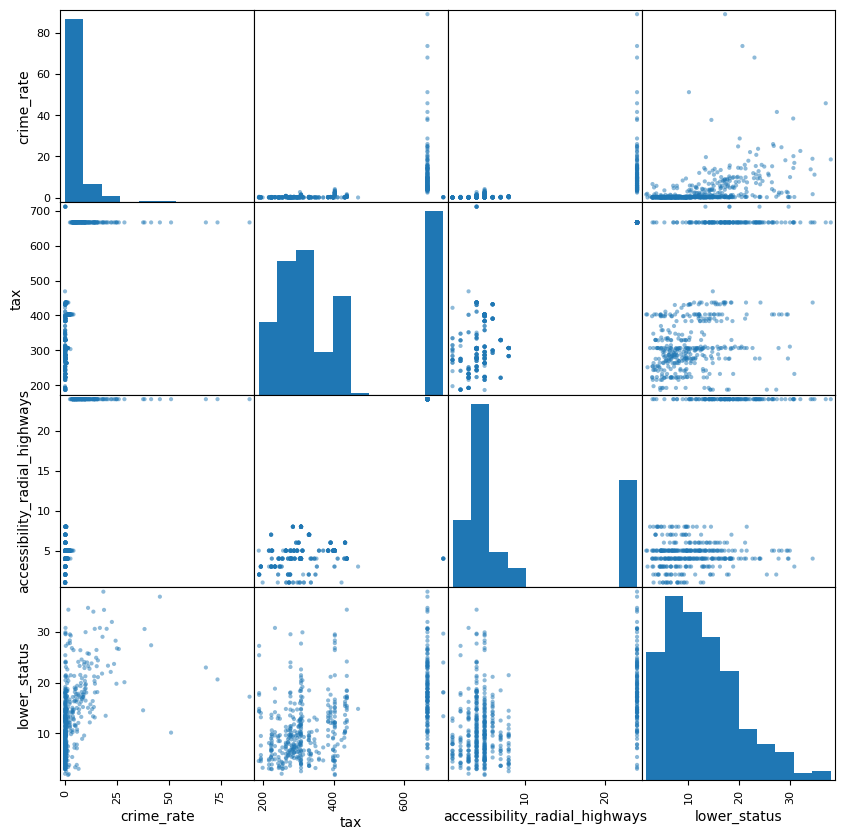

In [100]:
fig, ax = plt.subplots(figsize = (10, 10))
pd.plotting.scatter_matrix(boston[['crime_rate', 'tax', 'accessibility_radial_highways', 'lower_status']], ax = ax);

#### Are any of the predictors associated with per capita crime rate?

#### Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [101]:
high_crime = boston['crime_rate'].describe().loc['75%']
high_pt_ratio = boston['pupil_teacher_ratio'].describe().loc['75%']
high_tax = boston['tax'].describe().loc['75%']

In [102]:
filtered_boston_high_crime = boston[boston['crime_rate'] > high_crime]
filtered_boston_high_crime.head()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,26.42,15.6
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,12.67,22.6


In [103]:
filtered_boston_high_ratio = boston[boston['pupil_teacher_ratio'] > high_pt_ratio]
filtered_boston_high_ratio.head()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26,20.4
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,18.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,8.47,19.9
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58,23.1
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,14.67,17.5


In [104]:
filtered_boston_high_tax = boston[boston['tax'] > high_tax]
filtered_boston_high_tax.head()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


#### How many of the suburbs in this data set bound the Charles river?

In [113]:
charles_suburbs = boston[boston['charles_river'] == 1]
charles_suburbs.shape[0]

35

#### What is the median pupil-teacher ratio among the towns in this data set?

In [106]:
median_pt_ratio = boston['pupil_teacher_ratio'].median()
median_pt_ratio

19.05

#### Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors?

In [107]:
lowest_median = boston['median_value'].min()

In [108]:
lowest_median_suburb = boston[boston['median_value'] == lowest_median]
lowest_median_suburb

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [109]:
boston.describe()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

In [110]:
suburbs_seven_rooms = boston[boston['average_number_rooms'] > 7]
suburbs_seven_rooms.shape[0]

64

In [111]:
suburbs_eight_rooms = boston[boston['average_number_rooms'] > 8]
suburbs_eight_rooms.shape[0]

13

In [112]:
suburbs_eight_rooms.describe()

,crime_rate,residential_land_zoned,non-retail_business_acres,charles_river,nitrogen_oxides,average_number_rooms,owner-occupied<1940,dis_5_boston_emp_centers,accessibility_radial_highways,tax,pupil_teacher_ratio,lower_status,median_value
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
